## Data Description

For this HW, we will be using a dataset of around 7K books with data on title, subtitle, authors, categories, thumbnail url, description, published year, average rating, and number of ratings.

You can download this dataset from the link below or from canvas as `books.csv`

Link to dataset: https://www.kaggle.com/dylanjcastillo/7k-books-with-metadata


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [ ]:
# Load data

books = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/books.csv')

In [ ]:
books

## Section 1: Top Authors

Produce a chart showing the top 10 authors by count of books written in this dataset.

Although not explicitly covered in the lecture, `sns.catplot` with `kind="bar"` may be a good choice for chart type*

In [ ]:
# clean and only showing important columns 
clean_books = books.loc[:,['title', 'authors','categories','published_year','average_rating','num_pages']].dropna().drop_duplicates()
clean_books

In [ ]:
# Write your code below

# group by authors 
clean_top_books = clean_books.groupby(by=['authors'], as_index=False)['title'].count()
# convert title to int
clean_top_books.title = clean_top_books.title.astype(int)
# sort high to low for by title
clean_top_books.sort_values(by='title', ascending=False, inplace=True)

clean_top_books.head(10)




,authors,title
29,Agatha Christie,37
3282,Stephen King,36
3657,William Shakespeare,29
1814,John Ronald Reuel Tolkien,25
3567,Virginia Woolf,23
3141,Sandra Brown,23
1581,Janet Evanovich,20
2650,Orson Scott Card,20
2805,Piers Anthony,19
3419,Terry Pratchett,17


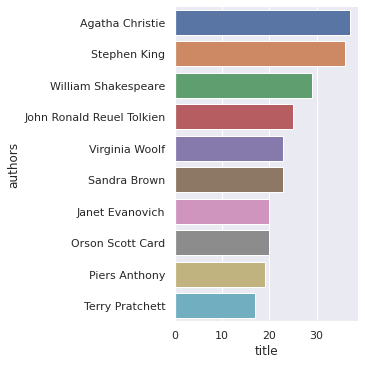

In [ ]:
# plot top authors by their books
sns.catplot(data=clean_top_books.head(10), x="title", y='authors', kind="bar")

## Section 2: Page Counts by Category

Create a chart showing the distribution of page counts by category. 


*   Compare the following categories: 
  * Comics & Graphic Novels
  * Juvenile Fiction
  * History
  * Philosophy
*   Remove any books with > 1000 pages (the outliers)
*   Use `sns.displot` with `kind="hist"` (a histogram)
  *   Try different numbers of bins with `bins=` to find a good balance
  *   Plot multiple charts (one per category) on the FacetGrid
  *   Use `kde=True` to better visualize the distribution



In [ ]:
categories = [
    "Comics & Graphic Novels",
    "Juvenile Fiction", 
    "History", 
    "Philosophy"
]

In [ ]:
# use condition to get only number of pages that are less tha 1000
num_pages_less = clean_books.num_pages < 1000

#combine boolean between authors and num_pages
is_category = clean_books[clean_books.categories.isin(categories) & num_pages_less] 
is_category



,title,authors,categories,published_year,average_rating,num_pages
35,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,2002.0,3.50,32.0
37,The Princess of the Chalet School,Elinor Mary Brent-Dyer,Juvenile Fiction,2000.0,4.10,159.0
98,The voyage of the Dawn Treader,Clive Staples Lewis,Juvenile Fiction,1970.0,4.09,216.0
102,Reason in History,Georg Wilhelm Friedrich Hegel,Philosophy,1953.0,3.64,95.0
104,The Presocratics,Philip Wheelwright,Philosophy,1966.0,4.04,352.0
...,...,...,...,...,...,...
6765,Under The Influence,Preston Peet,History,2004.0,3.64,312.0
6766,Real Rule of Four,Joscelyn Godwin,History,2004.0,3.45,208.0
6795,五輪書 : 英文版,武蔵·宮本,Philosophy,2002.0,4.08,157.0
6805,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,1999.0,4.51,531.0


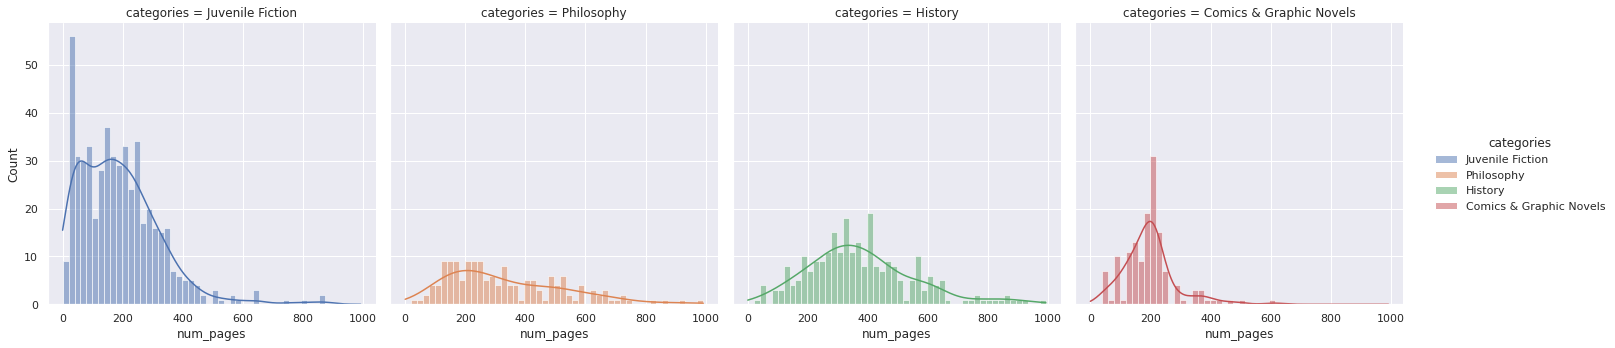

In [ ]:
# plot ech category to show their num_pages seperatly
sns.displot(data=is_category, x='num_pages', hue= 'categories', bins=50, kde=True, col='categories')

## Section 3: Rating Comparison for Top Authors

**Part 1:**

Create a box plot showing the distribution of `average_rating` for the set of authors provided below.  Put the `authors` on the y-axis and the `average_rating` on the x-axis for better readability.



In [ ]:
authors_no = [
    "Agatha Christie", 
    "Virginia Woolf", 
    "Stephen King", 
    "William Shakespeare", 
    "John Ronald Reuel Tolkien",
    "Sandra Brown",
    "Orson Scott Card"
]

In [ ]:
# Write your code below

#use condition to filter only 7 authors in the list 
is_authors = clean_books[clean_books.authors.isin(authors_no)]
is_authors

,title,authors,categories,published_year,average_rating,num_pages
6,An Autobiography,Agatha Christie,"Authors, English",1977.0,4.27,560.0
17,Witness for the Prosecution & Selected Plays,Agatha Christie,English drama,1995.0,4.05,352.0
25,Miss Marple,Agatha Christie,"Detective and mystery stories, English",1997.0,4.20,359.0
39,Tree and Leaf,John Ronald Reuel Tolkien,Literary Collections,2001.0,4.09,176.0
40,Partners in Crime,Agatha Christie,"Beresford, Tommy (Fictitious character)",2001.0,3.77,347.0
...,...,...,...,...,...,...
6414,The Fellowship of the Ring,John Ronald Reuel Tolkien,Fiction,2003.0,4.35,855.0
6505,Shadow of the Giant,Orson Scott Card,Life on other planets,2005.0,3.99,388.0
6695,Shakespeare's Sonnets,William Shakespeare,Drama,1997.0,4.25,488.0
6702,Hamlet: The Texts of 1603 and 1623,William Shakespeare,Drama,2006.0,4.01,384.0


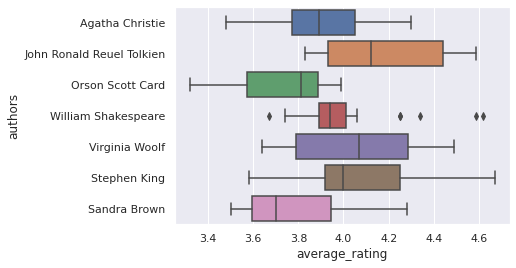

In [ ]:
# plot the distribution of the specified authors in the list
sns.boxplot(data=is_authors, x='average_rating', y='authors')

**Part 2:**

Create a **point plot** showing each author's top 10 books (by average rating), sorted from highest to lowest.  

Suggested steps:
*   Filter the dataset to the authors of interest (you may have already done this in part 1)
*   Create a new dataframe that is sorted by `average_rating` **within** each author group. This is tricky. First group by `authors`, then use `apply` to sort **within each group**.  For `apply`, you can use the following code: `.apply(lambda x: x.sort_values(by="average_rating", ascending=False))`.  The apply lambda function here is essentially reading in each `authors` group as input in the form of a dataframe (set as `x`) and returning the dataframe sorted by `average_rating`.
*   When plotting, use `sns.catplot` and `kind="point"`. The dataframe you pass in should be the one you created from the bullet point above, but you will need to group by `authors` again and use `head` to pull the top 10 records per group.
  *  Put the `title` on the y-axis and the `average_rating` on the x-axis
  *  Use `row` to plot each author as a row on the FacetGrid
  *  Set `sharey` to False as each chart will have different values on the y-axis (the book titles) so we don't want to share this axis.
  *  Use `aspect` to increase the width of the charts to make it more readable 



In [ ]:
# Write your code below

# groupby authors and use lambda to sort the high to low and get only top 10
top_authors_books = is_authors.groupby(by=['authors'], as_index=False).apply(lambda x: x.sort_values(by='average_rating', ascending=False).head(10))
top_authors_books.head(12)

title  ... num_pages
0 2517                     Hercule Poirot's Casebook  ...     861.0
  6                                 An Autobiography  ...     560.0
  6208                   The Murder of Roger Ackroyd  ...     288.0
  88                                          Poirot  ...     727.0
  25                                     Miss Marple  ...     359.0
  2619                  Murder on the Orient Express  ...     322.0
  6204                  Murder on the Orient Express  ...     266.0
  6211                             Death on the Nile  ...     351.0
  17    Witness for the Prosecution & Selected Plays  ...     352.0
  6206                        Murder at the Vicarage  ...     288.0
1 1937            The Hobbit / The Lord of the Rings  ...    1728.0
  5622                        The Return of the King  ...     440.0

[12 rows x 6 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3795: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


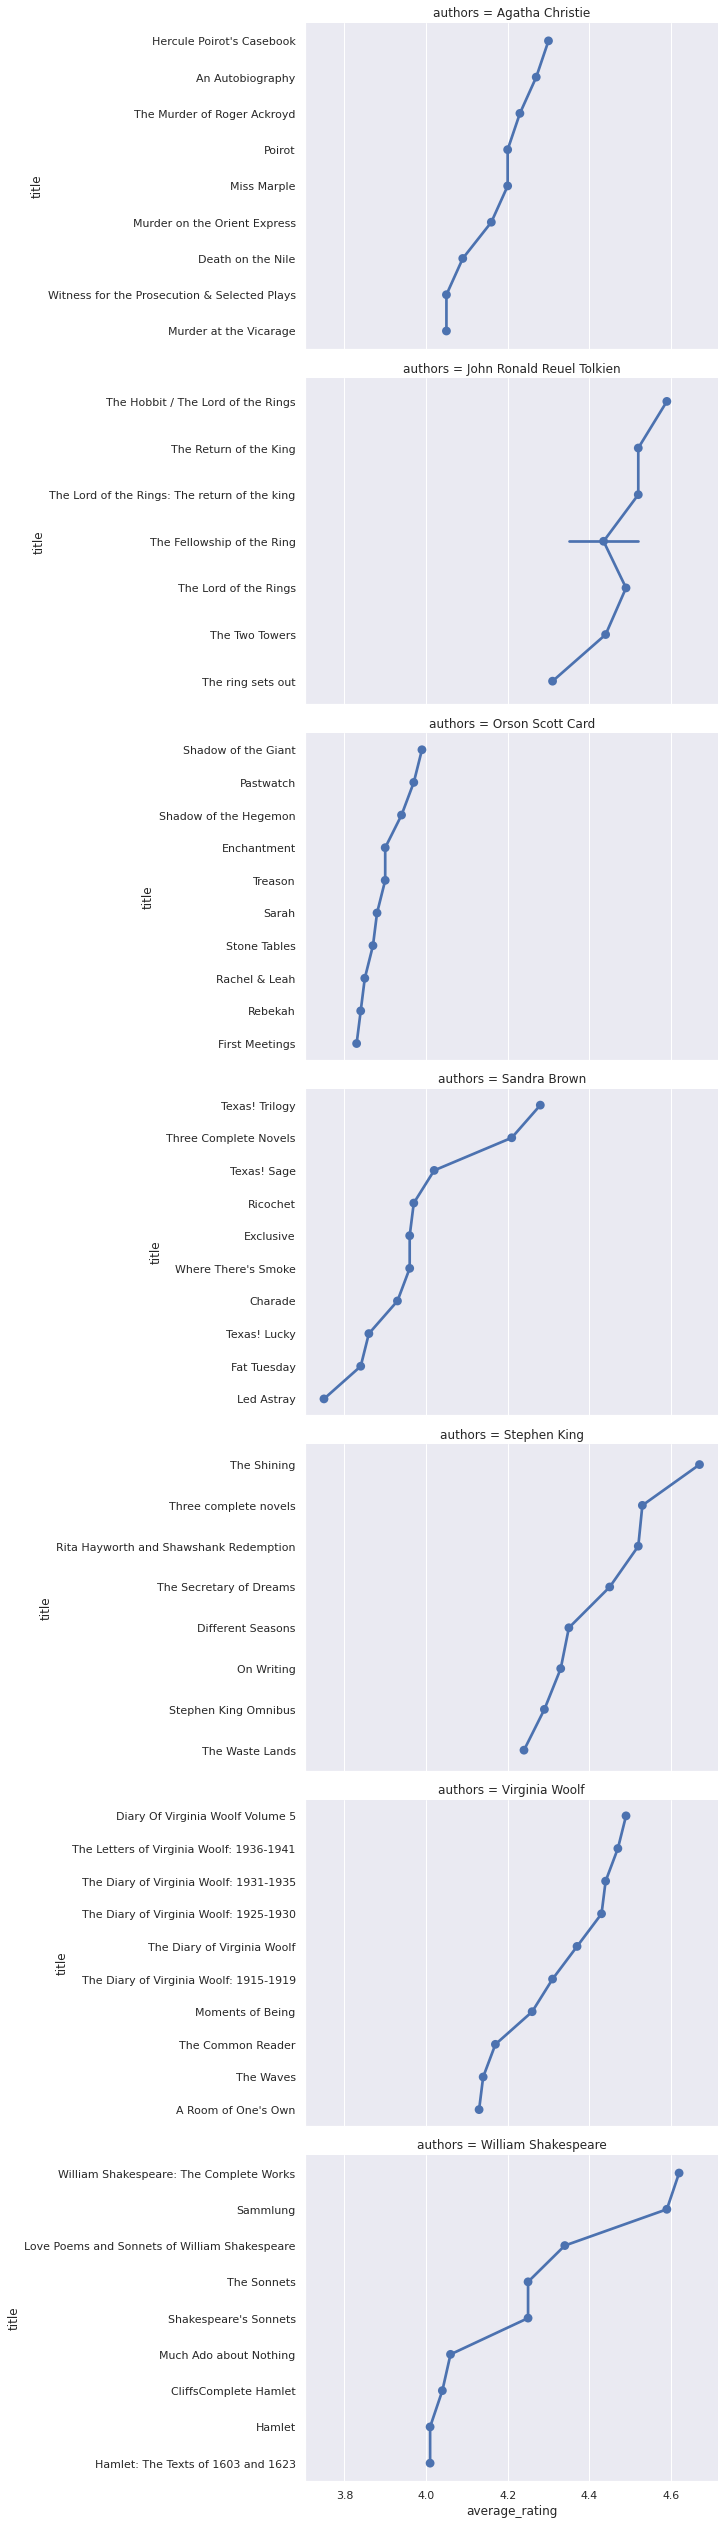

In [ ]:
# shows top 10 books per author
sns.catplot(kind="point", data=top_authors_books, x='average_rating', y='title', row='authors', sharey=False, aspect=2)